In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from matplotlib import pyplot
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
coca=pd.read_excel("C:/Users/Sushi/Downloads/CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
coca.tail().T

,37,38,39,40,41
Quarter,Q2_95,Q3_95,Q4_95,Q1_96,Q2_96
Sales,4936.0,4895.0,4333.0,4194.0,5253.0


In [5]:
coca.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


In [6]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [8]:
coca.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [9]:
temp = coca.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [10]:
coca['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [11]:
coca.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
coca1= coca.drop(['Quarter'], axis=1)

In [13]:
coca1.reset_index(inplace=True)

In [14]:
coca1['quater'] = pd.to_datetime(coca['quater'])

In [15]:
coca1= coca1.set_index('quater')

In [16]:
coca1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


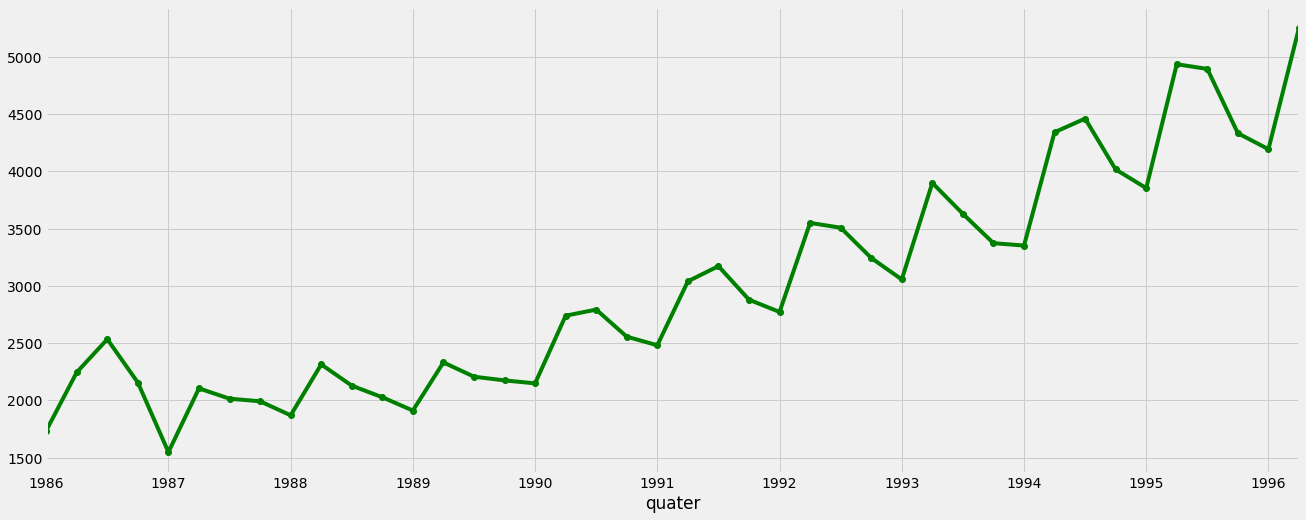

In [17]:
coca1['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

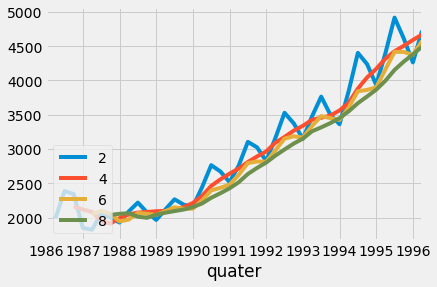

In [18]:
for i in range(2,10,2):
    coca1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

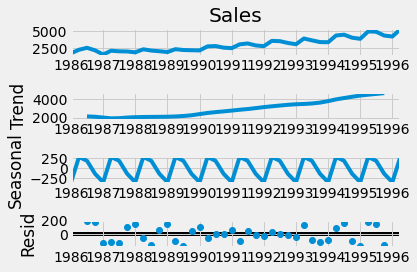

In [19]:
ts_add =seasonal_decompose(coca1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

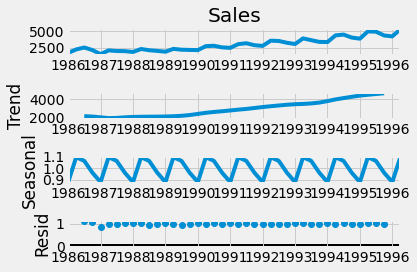

In [20]:
ts_mul = seasonal_decompose(coca1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

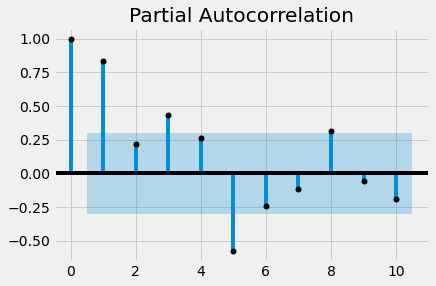

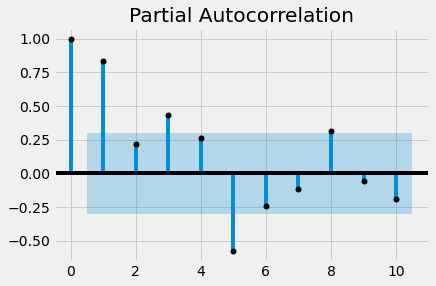

In [21]:
tsa_plots.plot_pacf(coca1.Sales, lags=10,color='black')

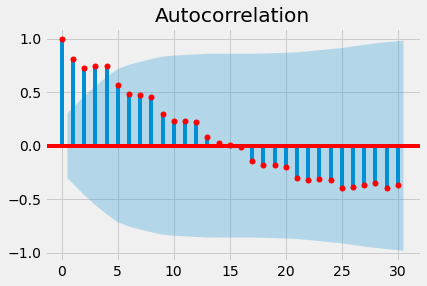

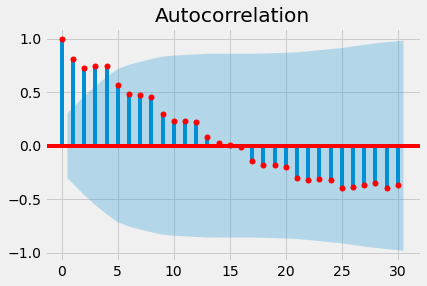

In [22]:
tsa_plots.plot_acf(coca1.Sales, lags=30,color='red')

# Building Time series forecasting with ARIMA

In [23]:
X = coca1['Sales'].values

In [24]:
size = int(len(X) * 0.66)

In [25]:
train, test = X[0:size], X[size:len(X)]

In [26]:
model = ARIMA(train, order=(5,1,0))

In [27]:
model_fit = model.fit(disp=0)

In [28]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Wed, 06 Apr 2022   AIC                            358.071
Time:                        23:16:37   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8439     26.509      1.579      0.114     -10.112      93.800
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

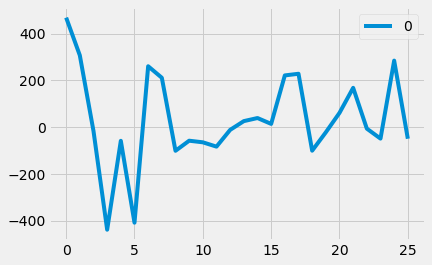

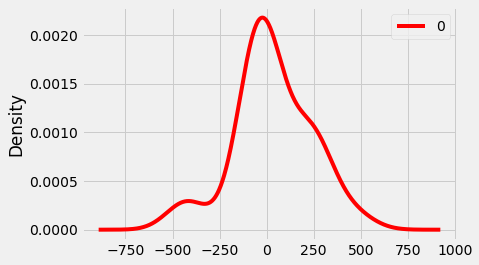

                0
count   26.000000
mean    31.325229
std    202.029833
min   -438.906016
25%    -58.603674
50%     -9.191046
75%    200.235838
max    468.290074


In [29]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

# Rolling Forecast ARIMA Model

In [30]:
history = [x for x in train]

In [31]:
predictions = list()

In [32]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3135.587044, expected=3243.859993
predicted=3188.846528, expected=3056.000000
predicted=3734.223939, expected=3899.000000
predicted=3782.620608, expected=3629.000000
predicted=3355.125737, expected=3373.000000
predicted=3297.218442, expected=3352.000000
predicted=4112.813713, expected=4342.000000
predicted=3961.044575, expected=4461.000000
predicted=4130.786404, expected=4017.000000
predicted=3912.795318, expected=3854.000000
predicted=4687.043506, expected=4936.000000
predicted=4970.519654, expected=4895.000000
predicted=4384.039898, expected=4333.000000
predicted=4229.062447, expected=4194.000000
predicted=5261.672755, expected=5253.000000


In [33]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31594.694


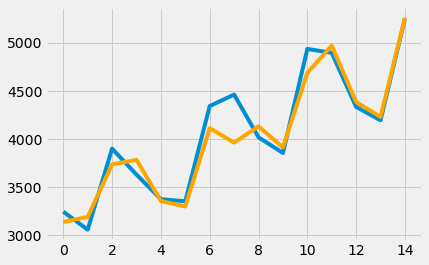

In [34]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()

# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

In [35]:
coca2 = pd.get_dummies(coca, columns = ['Quarter'])

In [36]:
coca2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [37]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,Jan-1986,Apr-1986,Jul-1986,Oct-1986,Jan-1987
Q1,1,0,0,0,0
Q1,0,0,0,0,1
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0


In [38]:
t= np.arange(1,43)

In [39]:
coca2['t'] = t

In [40]:
coca2['t_sq'] = coca2['t']*coca2['t']

In [41]:
log_Sales=np.log(coca2['Sales'])

In [42]:
coca2['log_Sales']=log_Sales

In [43]:
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,Jan-1986,Apr-1986,Jul-1986,Oct-1986,Jan-1987
Q1,1,0,0,0,0
Q1,0,0,0,0,1
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0
Q1,0,0,0,0,0


In [44]:
train1, test1 = np.split(coca2, [int(.67 *len(coca2))])

In [45]:
linear= smf.ols('Sales~t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918638

In [46]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037454

In [47]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900188